import library

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Read data

In [2]:
data_app = pd.read_csv('../input/credit-card-approval-prediction/application_record.csv')
data_cre = pd.read_csv('../input/credit-card-approval-prediction/credit_record.csv')

# Describe and analyst data


- application record data

In [3]:
data_app.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000         1.0         0.000000       0.000000   
50%     -1467.000000         1.0         0.000000       0.000000   
75%      -371.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  
count  438557.000000    438557.000000  
mean        0.108207         2.194465  
std         0.310642         0.897207  
min         0.000000         1.000000  
25%         0.000000         2.000000  
50%         0.000000         2.000000  
75%         0.000000         3.000000  
max         1.000000        20.000000

In [4]:
ProfileReport(data_app, title="Data application ")

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Conclude: 
- 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',	'DAYS_EMPLOYED' and'CNT_FAM_MEMBERS' columns are numeric, other columns are categorycal. 
- Most columns are not missing data. Except OCUPATION_TYPE columns have 30% of missing data. We can remove this columns or preprocessing carefully it before training .
- The FLAG_MOBILE is have 1 value, that's why it is not neccessary for the model.


- Credict record data

In [5]:
data_cre.describe()

ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00

In [6]:
data_cre.profile_report(title='Credict record')

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Conclude:
- The data do not have mising
- The label is status culumn and it include 8 values. We need convert it to binary label (bad or not bad)


# Merge data
The data include two files and we need merge them base the ID culumns. After that, we will remove the ID columns from table.



In [7]:
data = pd.merge(data_app, data_cre, on='ID')

In [8]:
# remove ID colums
data = data.drop('ID', axis=1)

In [9]:
data

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0                M            Y               Y             0   
1                M            Y               Y             0   
2                M            Y               Y             0   
3                M            Y               Y             0   
4                M            Y               Y             0   
...            ...          ...             ...           ...   
777710           M            N               Y             0   
777711           M            N               Y             0   
777712           M            N               Y             0   
777713           M            N               Y             0   
777714           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005          -4542   
1             Civil marriage  Rented apartment      -12005          -4542   
2             Civil marriage  Rented apartment      -12005          -4542   
3             Civil marriage  Rented apartment      -12005          -4542   
4             Civil marriage  Rented apartment      -12005          -4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188          -1193   
777711  Single / not married  Rented apartment       -9188          -1193   
777712  Single / not married  Rented apartment       -9188          -1193   
777713  Single / not married  Rented apartment       -9188          -1193   
777714  Single / not married  Rented apartment       -9188          -1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                1           0           0             NaN   
3                1                1           0           0             NaN   
4                1                1           0           0             NaN   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
0                   2.0               0      C  
1                   2.0              -1      C  
2                   2.0              -2      C  
3                   2.0              -3      C  
4                   2.0              -4      C  
...                 ...             ...    ...  
777710              1.0              -9      0  
777711              1.0             -10      2 

# Preprocessing data
In this step, we need:
- preprocessing OCCUPATION_TYPE columns which have 30% of lost data. We have some ways to solve such as removing, filling by a value. Removing the column cause a part of information to be ignore. So I will chose filling miss-value bysa new value wich is called 'null'. Some people like fill miss-value by a value that is apper frequently or a random value. However, it can cause the point data to be a noise data.
- preprocessing categorical columns. We need tranform them to be one hot vectors
- preprocessing numeric columns. We need normalize before training model
- preprocessing label. The status column includes 8 values and the task required have two label. So we need tranform 8 valude to be binary label.

## preprocessing OCCUPATION_TYPE columns

In [10]:
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna("null")

## preprocessing label

acording the document with attached in the task. Bad customers are those with more than 90 days of loan debt.

In [11]:
# create labl
status_col = list(data['STATUS'])

label = []
for i in status_col:
  if i in {1,2,3, 'C', 'X'}:
    label.append(0)
  else:
    label.append(1)
    

In [12]:
len(label)

777715

In [13]:
# remove status from data
data = data.drop('STATUS', axis=1)

In [14]:
data

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0                M            Y               Y             0   
1                M            Y               Y             0   
2                M            Y               Y             0   
3                M            Y               Y             0   
4                M            Y               Y             0   
...            ...          ...             ...           ...   
777710           M            N               Y             0   
777711           M            N               Y             0   
777712           M            N               Y             0   
777713           M            N               Y             0   
777714           M            N               Y             0   

        AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0          Working               Higher education   
1               427500.0          Working               Higher education   
2               427500.0          Working               Higher education   
3               427500.0          Working               Higher education   
4               427500.0          Working               Higher education   
...                  ...              ...                            ...   
777710          112500.0          Working  Secondary / secondary special   
777711          112500.0          Working  Secondary / secondary special   
777712          112500.0          Working  Secondary / secondary special   
777713          112500.0          Working  Secondary / secondary special   
777714          112500.0          Working  Secondary / secondary special   

          NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage  Rented apartment      -12005          -4542   
1             Civil marriage  Rented apartment      -12005          -4542   
2             Civil marriage  Rented apartment      -12005          -4542   
3             Civil marriage  Rented apartment      -12005          -4542   
4             Civil marriage  Rented apartment      -12005          -4542   
...                      ...               ...         ...            ...   
777710  Single / not married  Rented apartment       -9188          -1193   
777711  Single / not married  Rented apartment       -9188          -1193   
777712  Single / not married  Rented apartment       -9188          -1193   
777713  Single / not married  Rented apartment       -9188          -1193   
777714  Single / not married  Rented apartment       -9188          -1193   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0            null   
1                1                1           0           0            null   
2                1                1           0           0            null   
3                1                1           0           0            null   
4                1                1           0           0            null   
...            ...              ...         ...         ...             ...   
777710           1                0           0           0        Laborers   
777711           1                0           0           0        Laborers   
777712           1                0           0           0        Laborers   
777713           1                0           0           0        Laborers   
777714           1                0           0           0        Laborers   

        CNT_FAM_MEMBERS  MONTHS_BALANCE  
0                   2.0               0  
1                   2.0              -1  
2                   2.0              -2  
3                   2.0              -3  
4                   2.0              -4  
...                 ...             ...  
777710              1.0              -9  
777711              1.0             -10  
777712              1.0             -11  
777713             

## preprocessing categorical columns.

In [15]:
categorical = data[['NAME_EDUCATION_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE','CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE',	'FLAG_PHONE',	'FLAG_EMAIL',	'OCCUPATION_TYPE']]

In [16]:
one_hot = OneHotEncoder().fit_transform(categorical).toarray()

In [17]:
one_hot.shape

(777715, 53)

## preprocessing numeric data
Numeric data can be transform to be categorical data but them will be cause a part nescessary information. In addition, most machine learning model solve numeric data very good. That's why, do not try convert  to be categorical data. 

In [18]:
numeric = data[['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH',	'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',	'MONTHS_BALANCE']]

In [19]:
# convert tobe array in numpy
numeric = np.array(numeric)
normal = normalize(numeric)

scale numeric data

In [20]:
# novalize scale
normal = normalize(numeric)
# Robust scale
robust_scaler = RobustScaler().fit_transform(numeric)
# Standard scale
stand_scaler = StandardScaler().fit_transform(numeric)

visual after scale

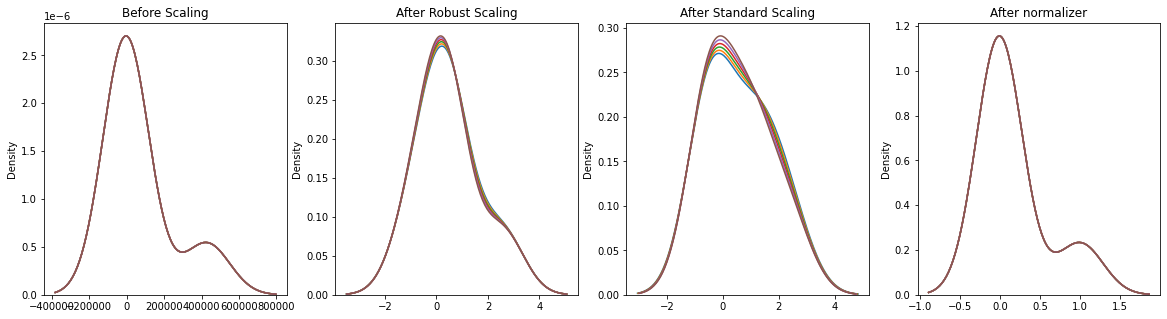

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(numeric[0], ax = ax1)
sns.kdeplot(numeric[1], ax = ax1)
sns.kdeplot(numeric[2], ax = ax1)
sns.kdeplot(numeric[3], ax = ax1)
sns.kdeplot(numeric[4], ax = ax1)
sns.kdeplot(numeric[5], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_scaler[0], ax = ax2)
sns.kdeplot(robust_scaler[1], ax = ax2)
sns.kdeplot(robust_scaler[2], ax = ax2)
sns.kdeplot(robust_scaler[3], ax = ax2)
sns.kdeplot(robust_scaler[4], ax = ax2)
sns.kdeplot(robust_scaler[5], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(stand_scaler[0], ax = ax3)
sns.kdeplot(stand_scaler[1], ax = ax3)
sns.kdeplot(stand_scaler[2], ax = ax3)
sns.kdeplot(stand_scaler[3], ax = ax3)
sns.kdeplot(stand_scaler[4], ax = ax3)
sns.kdeplot(stand_scaler[5], ax = ax3)

ax4.set_title('After normalizer')  
sns.kdeplot(normal[0], ax = ax4)
sns.kdeplot(normal[1], ax = ax4)
sns.kdeplot(normal[2], ax = ax4)
sns.kdeplot(normal[3], ax = ax4)
sns.kdeplot(normal[4], ax = ax4)
sns.kdeplot(normal[5], ax = ax4)

plt.show()



Include: base on above figure, the data before scaling is very good so just need using normalizer scale. Beside that, the output data of robust scale is too good. The different between scaler  is not larger so the result when using different scaler models are same. (I have experiment using Robust scaler and normalize scaler. And the accuracy and f1 score of them are equal).

# merge categorical data and numeric 

In [22]:
print(one_hot.shape)
print(numeric.shape)

(777715, 53)
(777715, 6)


In [23]:
X = np.concatenate((normal, one_hot), axis=1)

# train test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3)

In [25]:
print("Train lenght: ", len(X_train))
print("Test Length:  ", len(X_test))

Train lenght:  544400
Test Length:   233315


# Predict
The data is imbalance, not too high. I will experiment to compare using over sample is necessary or not. Next, I will compare between using different model such as logistic regression, svm, random forest, cnn. In the above machine learning algorithms, algorithm a gives better results because the group of decision tree algorithms often handles imbalanced data well and is better suited to financial data than other algorithms.

## demonstrating the data is imbalance

In [26]:
Count = Counter(label)
print('Number of 0 label: ', Count[0])
print('Number of 1 label: ', Count[1])

Number of 0 label:  475486
Number of 1 label:  302229


the difference in quantity of the two labels is not too great 

## evaluate

### Not over sampling

In [27]:
method = ['Random Forest', 'Logistic Regression', 'SVM', 'MLP']

In [28]:
for i in method:
  if i == 'Random Forest':
    clf = RandomForestClassifier()
  elif i == 'Logistic Regression':
    clf = LogisticRegression()
  elif i == 'SVM':
    clf = SVC()
  elif i == 'MLP':
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

  clf.fit(X_train, y_train)

  print("\n============================================================\n")
  print("Method: ", i)
  print(classification_report(y_test, clf.predict(X_test)))



Method:  Random Forest


              precision    recall  f1-score   support

           0       0.75      0.79      0.77    142697
           1       0.64      0.59      0.61     90618

    accuracy                           0.71    233315
   macro avg       0.70      0.69      0.69    233315
weighted avg       0.71      0.71      0.71    233315



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Over sample with SMOTE
There are many way to balance data such as under sampling, over sampl. And each way have many different method. In reality, over sampl often better than under sampling because under sampling will cause lost a part data. In many over sampling data method, SMOTE is the best that often bring good result than other methods.

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

### Over samling with SMOTE

In [ ]:
method = ['Random Forest', 'Logistic Regression', 'SVM', 'MLP']

In [ ]:
for i in method:
  if i == 'Random Forest':
    clf = RandomForestClassifier()
  elif i == 'Logistic Regression':
    clf = LogisticRegression()
  elif i == 'SVM':
    clf = SVC()
  elif i == 'MLP':
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

  clf.fit(X_sm, y_sm)

  print("\n============================================================\n")
  print("Method: ", i)
  print(classification_report(y_test, clf.predict(X_test)))

In [ ]:
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassif
# from sklearn.metrics import classification_report

# # clf = RandomForestClassifier()
# clf = SVC()

In [ ]:
# clf.fit(X_train, y_train)

In [ ]:
# print(classification_report(y_test, clf.predict(X_test)))

In [ ]:
X_train.shape